In [18]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# Importing dataset with pandas
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()
X = dataset.iloc[:,[3,4]].values


In [22]:
pd.DataFrame(X).head()

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0, 0.5, 'WCSS')

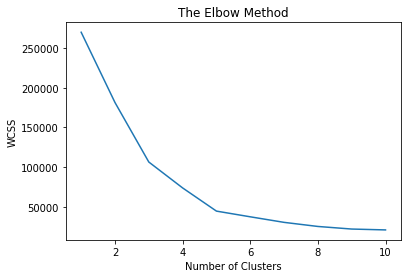

In [23]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)#inertia_ computes the wcss
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [24]:
# Applying K-means to the dataset (from the elbow method, k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)

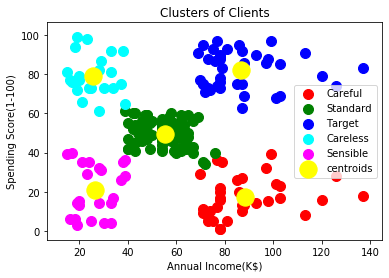

In [26]:
# Visualizing the clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100, c='red', label='Careful')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100, c='green', label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100, c='blue', label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100, c='magenta', label='Sensible')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300, c='yellow',label='centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()